# <font style = "color:rgb(139,0,0)">Neural Networks : Project 1 - Part 4</font> 

• DOMAIN: Autonomous Vehicles
• BUSINESS CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an
important component of modern-day map making. A classic example of a corpus of such street-level
photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree
panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the
transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of
the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the
optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text
recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the
visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and
character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows,
specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.
In this project, we will use the dataset with images centred around a single digit (many of the images do
contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more
complex than MNIST because of the distractors.
• DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder,
unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from
house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: http://
docs.h5py.org/en/stable/high/dataset.html
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading
Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and
Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary
• PROJECT OBJECTIVE: We will build a digit classifier on the SVHN (Street View Housing Number) dataset.
Steps and tasks: [ Total Score: 30 points]
1. Import the data.
2. Data pre-processing and visualisation.
3. Design, train, tune and test a neural network image classifier.
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.
4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of
epochs plot and write your observations on the same.

In [19]:
#necessary imports
import warnings
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import h5py
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.7f}'.format
pd.options.display.max_rows = None

## <font style = "color:rgb(139,0,0)">1 Importing the data</font> 

In [20]:
happy = h5py.File(r'C:\Users\DELL\Autonomous_Vehicles_SVHN_single_grey1.h5')
happy.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

##  <font style = "color:rgb(139,0,0)">2 Data pre-processing & visualisation</font> 

In [21]:
# Loading the training set, test set and data validation set.
X_train = happy['X_train'][:]
y_train = happy['y_train'][:]
X_test = happy['X_test'][:]
y_test = happy['y_test'][:]

### <font style = "color:rgb(139,0,0)">Example check for contents of features and labels from the images</font>  

In [22]:
X_train[:1]    

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [23]:
y_train[:1]

array([2], dtype=uint8)

In [24]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [25]:
y_test[:1]

array([1], dtype=uint8)

### <font style = "color:rgb(139,0,0)">  Visualising the first 10 images in the dataset.</font> 

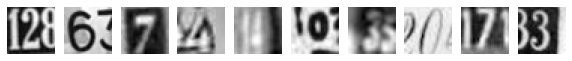

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [26]:
# visualizing the first 10 images in the dataset and their labels.
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

#### data shape

In [27]:
X_train.shape

(42000, 32, 32)

In [28]:
y_train.shape

(42000,)

Reshaping the X_train and X_test so that the same can be fed for model building. 
Feeding a 2D tensor into the model as currently I have a 3D tensor. 

### normalizing the data
Dividing by 255 as this is a grayscale image and can take values from 0-255.


In [29]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0
print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


### Here we need to apply one hot encoding of the labels for the model to understand the labels better. Using categorical cross entropy as our loss function. 

In [30]:
# Outputs of one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# total classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


## <font style = "color:rgb(139,0,0)">3 Design, train, tune and test a neural network image classifier.</font> 

#### Building the neural network model, fitting the training data, testing it and providing a model summary. 

In [31]:
# creating the model
def nn_mod():
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Creating an object for model

In [32]:
model = nn_mod()

In [33]:
# Compiling the model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### fitting the model on training dataset

In [36]:
train_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=350, verbose=2)

Epoch 1/150
120/120 - 2s - loss: 0.2409 - accuracy: 0.9220 - val_loss: 0.8084 - val_accuracy: 0.8206
Epoch 2/150
120/120 - 1s - loss: 0.2351 - accuracy: 0.9240 - val_loss: 0.8202 - val_accuracy: 0.8193
Epoch 3/150
120/120 - 1s - loss: 0.2336 - accuracy: 0.9242 - val_loss: 0.8583 - val_accuracy: 0.8166
Epoch 4/150
120/120 - 1s - loss: 0.2389 - accuracy: 0.9217 - val_loss: 0.8422 - val_accuracy: 0.8161
Epoch 5/150
120/120 - 1s - loss: 0.2330 - accuracy: 0.9248 - val_loss: 0.8369 - val_accuracy: 0.8194
Epoch 6/150
120/120 - 1s - loss: 0.2296 - accuracy: 0.9257 - val_loss: 0.8250 - val_accuracy: 0.8193
Epoch 7/150
120/120 - 1s - loss: 0.2413 - accuracy: 0.9212 - val_loss: 0.8405 - val_accuracy: 0.8209
Epoch 8/150
120/120 - 1s - loss: 0.2357 - accuracy: 0.9239 - val_loss: 0.8653 - val_accuracy: 0.8182
Epoch 9/150
120/120 - 2s - loss: 0.2416 - accuracy: 0.9199 - val_loss: 0.8524 - val_accuracy: 0.8117
Epoch 10/150
120/120 - 1s - loss: 0.2461 - accuracy: 0.9198 - val_loss: 0.8482 - val_accura

Epoch 82/150
120/120 - 1s - loss: 0.2032 - accuracy: 0.9326 - val_loss: 0.9701 - val_accuracy: 0.8126
Epoch 83/150
120/120 - 1s - loss: 0.2225 - accuracy: 0.9251 - val_loss: 0.9764 - val_accuracy: 0.8101
Epoch 84/150
120/120 - 1s - loss: 0.2130 - accuracy: 0.9300 - val_loss: 0.9659 - val_accuracy: 0.8151
Epoch 85/150
120/120 - 1s - loss: 0.2102 - accuracy: 0.9309 - val_loss: 0.9882 - val_accuracy: 0.8088
Epoch 86/150
120/120 - 1s - loss: 0.2154 - accuracy: 0.9283 - val_loss: 1.0043 - val_accuracy: 0.8111
Epoch 87/150
120/120 - 1s - loss: 0.2236 - accuracy: 0.9270 - val_loss: 0.9642 - val_accuracy: 0.8071
Epoch 88/150
120/120 - 1s - loss: 0.2255 - accuracy: 0.9244 - val_loss: 0.9948 - val_accuracy: 0.8005
Epoch 89/150
120/120 - 1s - loss: 0.2164 - accuracy: 0.9281 - val_loss: 0.9488 - val_accuracy: 0.8153
Epoch 90/150
120/120 - 1s - loss: 0.2010 - accuracy: 0.9341 - val_loss: 0.9616 - val_accuracy: 0.8166
Epoch 91/150
120/120 - 1s - loss: 0.2040 - accuracy: 0.9335 - val_loss: 0.9564 - v

## <font style = "color:rgb(139,0,0)">4 Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.
</font> 

In [37]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 1.040885329246521
Accuracy: 0.8134999871253967


Text(0.5, 1.0, 'Training and validation loss')

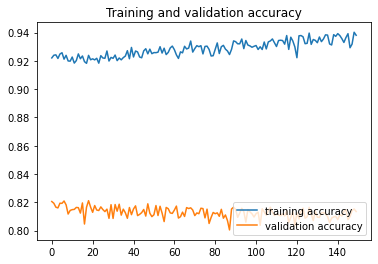

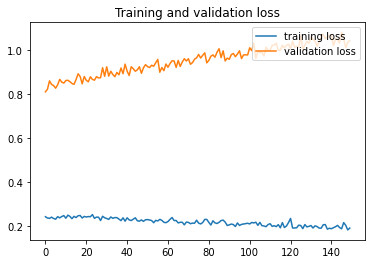

In [38]:
accuracy      = train_history.history['accuracy']
val_accuracy  = train_history.history['val_accuracy']
loss     = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs   = range(len(accuracy)) 
plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()
plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.
After training a Neural Network with dense hidden layers of different number of units we achieved a final test accuracy of  is 81.34%. 
Overfitting can be clearly observered in some points in the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.
Therfore within this accuracy we are able to distinguish between the different digits in this dataset.
